## Imports

In [1]:
# System functionality
import sys
sys.path.append('..')

import glob
import os
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import graphviz
import math as math
import json
import cv2
import eli5
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sympy import *
from skimage import data, io, filters
from numpy import linspace
from numpy.core.umath import pi
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
from emoji_extractor.extract import Extractor
from emojipedia import Emojipedia
from skimage import io
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics.pairwise import chi2_kernel
#from utils.plotter import plot_SVM_DecisionBoundary
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss, f1_score
from pandas.api.types import CategoricalDtype
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  (ExtraTreesClassifier, RandomForestClassifier, 
                              AdaBoostClassifier, GradientBoostingClassifier)

## Importance by each class

In [2]:
# To get the importance according to each class:
def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)

    out = {}
    for c in set(Y):
        out[c] = dict(
            zip(range(N), np.mean(X[Y==c, :], axis=0)*feature_importances)
        )
    return out

## Bar Chart Formatters

In [3]:
# Millions Formatter Function
def millions(x,pos):
    return '%1.1fK' % (x*1e-3)

# Power of 10 Formatter Function (y log scale bug, so i have created this formatter)
def pow10(x,pos):
    return "{:.0f}\n10 ".format(x)

# Power of 10 (1 d.p) Formatter Function (y log scale bug, so i have created this formatter)
def pow10_1dp(x,pos):
    return "{:.1f}\n10     ".format(x)

# Percenatge Formatter Function
def percentage(x,pos):
    return "{:.1f}%".format(x*100)

# Create a formatters
formatter_millions = FuncFormatter(millions)
formatter_pow10 = FuncFormatter(pow10)
formatter_pow10_1dp = FuncFormatter(pow10_1dp)
formatter_percentage = FuncFormatter(percentage)

# Use TwitterColorEmoji Font (only one supporting emojis) 
emojis_font = FontProperties(fname='./Fonts/TwitterColorEmoji-SVGinOT.ttf',size=55)

## Emojis on Bar Chart Function

In [4]:
def bar_chart_plot_emojis(ax,fig,x):
    # Set sizes of figure and images
    ax_width = ax.get_window_extent().width
    fig_width = fig.get_window_extent().width
    fig_height = fig.get_window_extent().height
    img_size = ax_width/(fig_width*len(x_linespace))
    img_axs = [None for i in range(len(x_linespace))]

    # Display emojis pngs on x-axis
    for i in range(len(x)):
        loc = ax.transData.transform((x_linespace[i], 0))      # Optimize y manually 
        img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2,
                                   img_size, img_size], anchor='C')

        # Platform 5 = Twitter
        img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
        img_axs[i].axis("off")

## Load csvs

In [5]:
path_counts_ran = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/random_per_user_emoji_counts.csv'
path_users_ran = '/home/stelios/Desktop/Honours Project/Samples/user_data/ran.csv'
counts_df_ran = pd.read_csv(path_counts_ran,index_col=None, header=0, low_memory = False)
users_df_ran = pd.read_csv(path_users_ran,index_col=None, header=0, low_memory = False)

path_counts_lon = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/london_per_user_emoji_counts.csv'
path_users_lon = '/home/stelios/Desktop/Honours Project/Samples/user_data/lon.csv'
counts_df_lon = pd.read_csv(path_counts_lon,index_col=None, header=0, low_memory = False)
users_df_lon = pd.read_csv(path_users_lon,index_col=None, header=0, low_memory = False)

path_counts_joh = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/joh_per_user_emoji_counts.csv'
path_users_joh = '/home/stelios/Desktop/Honours Project/Samples/user_data/joh.csv'
counts_df_joh = pd.read_csv(path_counts_joh,index_col=None, header=0, low_memory = False)
users_df_joh = pd.read_csv(path_users_joh,index_col=None, header=0, low_memory = False)

path_counts_nyc = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/nyc_per_user_emoji_counts.csv'
path_users_nyc = '/home/stelios/Desktop/Honours Project/Samples/user_data/nyc.csv'
counts_df_nyc = pd.read_csv(path_counts_nyc,index_col=None, header=0, low_memory = False)
users_df_nyc = pd.read_csv(path_users_nyc,index_col=None, header=0, low_memory = False)

In [6]:
# Append counts from all Locations
counts = counts_df_ran.append(counts_df_lon, sort=False,ignore_index=True).append(counts_df_joh, sort=False,ignore_index=True).append(counts_df_nyc, sort=False,ignore_index=True)
print(counts.shape)

# Append users from all Locations
users = users_df_ran.append(users_df_lon, sort=False,ignore_index=True).append(users_df_joh, sort=False,ignore_index=True).append(users_df_nyc, sort=False,ignore_index=True)
print(users.shape)

# Fill NaN with 0.0
counts = counts.fillna(0.0)

(40000, 2579)
(40000, 28)


In [7]:
# Preview counts
counts.describe()

👨🏿‍🔬         🚵🏽‍♂️          👨🏾‍🎤          👩🏾‍🏫         🙍🏽‍♂️  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.000025      0.000050      0.000225      0.000300      0.000225   
std        0.005000      0.007071      0.035707      0.031622      0.022912   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      7.000000      5.000000      3.000000   

                 🇮🇨        👳🏾‍♀️        👨🏾‍🏫           🦠         💂🏻‍♀️  ...  \
count  40000.000000  40000.00000  40000.0000  40000.0000  40000.000000  ...   
mean       0.000075      0.00020      0.0001      0.0001      0.000050  ...   
std        0.011180      0.01581      0.0100      0.0100      0.007071  ...   
min        0.000000      0.00000      0.0000      0.0000      0.000000  ...   
25%        0.000000      0.00000      0.0000      0.0000      0.000000  ...   
50%        0.000000      0.00000      0.0000      0.0000      0.000000  ...   
75%        0.000000      0.00000      0.0000      0.0000      0.000000  ...   
max        2.000000      2.00000      1.0000      1.0000      1.000000  ...   

              🧗🏻‍♂️          👩🏾‍🚒          👩🏿‍🎨         👨🏿‍✈️            👰🏿  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.000050      0.000075      0.000100      0.000100      0.000125   
std        0.007071      0.015000      0.015811      0.015811      0.018028   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      3.000000      3.000000      3.000000      3.000000   

            ⛹🏿‍♂️       🤹🏽‍♂️         🧜🏿‍♂️            🇵🇲           🇬🇺  
count  40000.0000  40000.0000  40000.000000  40000.000000  40000.00000  
mean       0.0002      0.0002      0.000225      0.000075      0.00005  
std        0.0400      0.0400      0.045000      0.015000      0.01000  
min        0.0000      0.0000      0.000000      0.000000      0.00000  
25%        0.0000      0.0000      0.000000      0.000000      0.00000  
50%        0.0000      0.0000      0.000000      0.000000      0.00000  
75%        0.0000      0.0000      0.000000      0.000000      0.00000  
max        8.0000      8.0000      9.000000      3.000000      2.00000  

[8 rows x 2579 columns]

## % Feuture representation

In [8]:
# Feature % representation
for index, row in counts.iterrows():
    counts.loc[index] = counts.loc[index]/counts.loc[index].sum()
counts.describe()

👨🏿‍🔬         🚵🏽‍♂️          👨🏾‍🎤          👩🏾‍🏫         🙍🏽‍♂️  \
count  2.722600e+04  2.722600e+04  27226.000000  27226.000000  2.722600e+04   
mean   2.836262e-08  1.853382e-07      0.000004      0.000001  4.870087e-07   
std    4.679919e-06  2.930671e-05      0.000589      0.000101  3.824005e-05   
min    0.000000e+00  0.000000e+00      0.000000      0.000000  0.000000e+00   
25%    0.000000e+00  0.000000e+00      0.000000      0.000000  0.000000e+00   
50%    0.000000e+00  0.000000e+00      0.000000      0.000000  0.000000e+00   
75%    0.000000e+00  0.000000e+00      0.000000      0.000000  0.000000e+00   
max    7.722008e-04  4.830918e-03      0.097222      0.012594  3.984064e-03   

                 🇮🇨         👳🏾‍♀️          👨🏾‍🏫             🦠         💂🏻‍♀️  \
count  2.722600e+04  2.722600e+04  2.722600e+04  27226.000000  2.722600e+04   
mean   1.662974e-07  3.372688e-07  6.847104e-07      0.000001  4.770146e-07   
std    1.959546e-05  2.310104e-05  7.042348e-05      0.000108  7.168357e-05   
min    0.000000e+00  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
max    2.583979e-03  2.403846e-03  8.474576e-03      0.013699  1.176471e-02   

       ...         🧗🏻‍♂️          👩🏾‍🚒          👩🏿‍🎨         👨🏿‍✈️  \
count  ...  2.722600e+04  2.722600e+04  27226.000000  2.722600e+04   
mean   ...  3.034764e-07  2.123098e-07      0.000001  7.417875e-07   
std    ...  4.115603e-05  3.503176e-05      0.000146  1.045872e-04   
min    ...  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
25%    ...  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
50%    ...  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
75%    ...  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
max    ...  6.578947e-03  5.780347e-03      0.023438  1.694915e-02   

                 👰🏿         ⛹🏿‍♂️         🤹🏽‍♂️         🧜🏿‍♂️            🇵🇲  \
count  27226.000000  27226.000000  2.722600e+04  27226.000000  2.722600e+04   
mean       0.000004      0.000007  4.848792e-07      0.000001  7.395221e-07   
std        0.000638      0.001128  8.000653e-05      0.000192  1.220234e-04   
min        0.000000      0.000000  0.000000e+00      0.000000  0.000000e+00   
25%        0.000000      0.000000  0.000000e+00      0.000000  0.000000e+00   
50%        0.000000      0.000000  0.000000e+00      0.000000  0.000000e+00   
75%        0.000000      0.000000  0.000000e+00      0.000000  0.000000e+00   
max        0.105263      0.186047  1.320132e-02      0.031690  2.013423e-02   

                 🇬🇺  
count  2.722600e+04  
mean   1.958912e-07  
std    3.232264e-05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    5.333333e-03  

[8 rows x 2579 columns]

## Add race labels

In [10]:
# Add gender column
race_counts_df = counts 
race_counts_df['ethnicity'] = users['ethnicity']
race_counts_df = race_counts_df.dropna()

In [11]:
# Preview counts with gender labels
race_counts_df

👨🏿‍🔬  🚵🏽‍♂️  👨🏾‍🎤  👩🏾‍🏫  🙍🏽‍♂️   🇮🇨  👳🏾‍♀️  👨🏾‍🏫    🦠  💂🏻‍♀️  ...  \
2       0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
3       0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
9       0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
12      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
14      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
17      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
21      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
29      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
33      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
35      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
40      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
41      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
42      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
43      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
44      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
48      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
49      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
50      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
52      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
59      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
65      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
66      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
67      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
68      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
70      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
71      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
80      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
83      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
85      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
95      0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
...     ...    ...   ...   ...    ...  ...    ...   ...  ...    ...  ...   
39909   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
39910   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
39911   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
39914   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
39916   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
39917   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
39921   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
39924   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
39925   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
39926   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
39930   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
39936   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
39942   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
39943   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
39944   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
39951   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
39952   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
39954   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
39956   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
39957   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  0.0    0.0  ...   
39965   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0

In [12]:
race_counts_df['ethnicity'].unique()

array(['asian', 'white', 'hispanic', 'black', 'other'], dtype=object)

In [13]:
# Count races
whites_count = 0
blacks_count = 0
asian_count = 0
hispanic_count = 0
other_count = 0

for i in race_counts_df['ethnicity']:
    if i == 'white':
        whites_count = whites_count+1
    if i == 'black':
        blacks_count = blacks_count+1
    if i == 'asian':
        asian_count = asian_count+1
    if i == 'hispanic':
        hispanic_count = hispanic_count+1
    if i == 'other':
        other_count = other_count+1
        
print("Whites: {}".format(whites_count))
print("Blacks: {}".format(blacks_count)) 
print("Asians: {}".format(asian_count))
print("Hispanics: {}".format(hispanic_count))
print("Other: {}".format(other_count))

Whites: 7047
Blacks: 6161
Asians: 780
Hispanics: 328
Other: 25


In [14]:
# Drop 'other' ethnicity
race_counts_df = race_counts_df[race_counts_df.ethnicity != 'other']
# Preview counts with ethnicity labels
race_counts_df['ethnicity'].unique()

array(['asian', 'white', 'hispanic', 'black'], dtype=object)

In [15]:
# Whites -> 0
# Blacks -> 1
# Asians -> 2
# Hispanics -> 3
race_counts_df = race_counts_df.replace('white', 0)
race_counts_df = race_counts_df.replace('black', 1)
race_counts_df = race_counts_df.replace('asian', 2)
race_counts_df = race_counts_df.replace('hispanic', 3)
race_counts_df['ethnicity'].unique()

array([2, 0, 3, 1])

In [16]:
X = race_counts_df.drop(columns=['ethnicity'])
y = race_counts_df['ethnicity']

## Random Forest Model

In [17]:
# Fit an Extra Trees model to the data
tree_model = RandomForestClassifier(n_estimators=500, criterion='entropy',random_state = 42,max_depth=144)
tree_model.fit(X,y)

# Display the relative importance of each attribute
print(tree_model.feature_importances_)
tree_model_imp = tree_model.feature_importances_

[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.17659090e-06
 5.45494942e-07 0.00000000e+00]


In [18]:
result = class_feature_importance(X, y, tree_model_imp)

In [19]:
result

{0: {0: -0.0,
  1: 0.0,
  2: 0.0,
  3: -0.0,
  4: -5.064333580816587e-09,
  5: 0.0,
  6: -6.913558620526166e-10,
  7: -3.176395315031098e-09,
  8: -1.2773230630972773e-08,
  9: 0.0,
  10: 0.0,
  11: 0.0,
  12: -3.4249652541553986e-09,
  13: 3.3381542800455873e-09,
  14: 0.0,
  15: 3.520917236478232e-08,
  16: 0.0,
  17: 6.969495040294181e-08,
  18: 1.7901823776784797e-09,
  19: -1.0872178702433528e-07,
  20: 4.4226939419438824e-08,
  21: 0.0,
  22: 0.0,
  23: -0.0,
  24: 2.490271686081636e-08,
  25: 0.0,
  26: 4.5056645125430313e-08,
  27: -1.6104607310411937e-08,
  28: 0.0,
  29: 2.4787619124557503e-08,
  30: 2.5763618504609455e-08,
  31: -8.58505171792767e-08,
  32: 7.255916760290791e-09,
  33: -9.093928056241667e-08,
  34: 0.0,
  35: -9.099804680145545e-09,
  36: -2.700088576291342e-09,
  37: -0.0,
  38: -2.8312713965658066e-09,
  39: 3.1403577023000943e-08,
  40: 6.050925983660877e-08,
  41: -1.2571998768715495e-08,
  42: -2.7984364039496003e-08,
  43: -4.135908252362625e-09,
  44:

In [20]:
tree_model_importance_white_pd = pd.DataFrame(columns = ['Emoji','Importance'])

# 0 for female
for emoji_key in (result[0]):
    tree_model_importance_white_pd = tree_model_importance_white_pd.append({'Emoji' : X.columns[emoji_key] , 'Importance' : result[0][emoji_key]} , ignore_index=True)
    
# Sort dataframe 
tree_model_importance_white_pd = tree_model_importance_white_pd.sort_values(by=['Importance'])
tree_model_importance_white_pd.tail(20)

Emoji  Importance
2245      😬    0.000210
2304      😱    0.000211
2330      💙    0.000248
2250     🙏🏻    0.000248
2313      😎    0.000267
2180  🤷🏻‍♀️    0.000275
2197     👏🏼    0.000276
2286      🙃    0.000279
2312      🎉    0.000282
2256     👍🏻    0.000310
2339      😊    0.000322
2279      😀    0.000349
2187     🙌🏻    0.000364
2329      🙄    0.000406
2337      🤔    0.000459
2291     👏🏻    0.000531
2335      👏    0.000544
2315      😉    0.000859
2345      ❤    0.000912
2333      👍    0.000975

In [21]:
tree_model_importance_black_pd = pd.DataFrame(columns = ['Emoji','Importance'])

# 1 for male
for emoji_key in (result[1]):
    tree_model_importance_black_pd = tree_model_importance_black_pd.append({'Emoji' : X.columns[emoji_key] , 'Importance' : result[1][emoji_key]} , ignore_index=True)
    
# Sort dataframe 
tree_model_importance_black_pd = tree_model_importance_black_pd.sort_values(by=['Importance'])
tree_model_importance_black_pd.tail(20)

Emoji  Importance
2320      😢    0.000277
1997     💪🏾    0.000323
2344      😍    0.000341
2319      😅    0.000368
2225      💃    0.000393
2105  🤦🏾‍♂️    0.000426
2122  🤦🏾‍♀️    0.000468
2301      💀    0.000476
2057  🤷🏾‍♂️    0.000533
2058  🤷🏾‍♀️    0.000614
2325      😩    0.000661
2323      💔    0.000703
1900     👌🏾    0.000744
2073     👏🏾    0.000834
2107     🙌🏾    0.001451
2165     🙏🏾    0.001750
2346      😭    0.002046
2343      🤣    0.003258
2336      🔥    0.003889
2347      😂    0.019071

In [22]:
tree_model_importance_asian_pd = pd.DataFrame(columns = ['Emoji','Importance'])

# 1 for male
for emoji_key in (result[2]):
    tree_model_importance_asian_pd = tree_model_importance_asian_pd.append({'Emoji' : X.columns[emoji_key] , 'Importance' : result[2][emoji_key]} , ignore_index=True)
    
# Sort dataframe 
tree_model_importance_asian_pd = tree_model_importance_asian_pd.sort_values(by=['Importance'])
tree_model_importance_asian_pd.tail(20)

Emoji  Importance
2296     💞    0.000515
2324     ☺    0.000550
2250    🙏🏻    0.000569
2166     ♀    0.000574
2330     💙    0.000698
2164     🐰    0.000877
2322     💛    0.000930
2318     😆    0.000938
2340     ✨    0.000993
2309     😔    0.001007
2327     💖    0.001038
2331     🙏    0.001099
2316     💚    0.001146
2339     😊    0.001169
2328     💗    0.001225
2317     💓    0.001649
2345     ❤    0.002600
2338     💜    0.003448
2341     💕    0.005062
2346     😭    0.008498

In [23]:
tree_model_importance_hispanic_pd = pd.DataFrame(columns = ['Emoji','Importance'])

# 1 for male
for emoji_key in (result[3]):
    tree_model_importance_hispanic_pd = tree_model_importance_hispanic_pd.append({'Emoji' : X.columns[emoji_key] , 'Importance' : result[3][emoji_key]} , ignore_index=True)
    
# Sort dataframe 
tree_model_importance_hispanic_pd = tree_model_importance_hispanic_pd.sort_values(by=['Importance'])
tree_model_importance_hispanic_pd.tail(20)

Emoji  Importance
2152     🙏🏼    0.000381
2337      🤔    0.000387
2275      😴    0.000394
2241      🤩    0.000402
2330      💙    0.000453
2298      🤤    0.000453
2260      🤧    0.000472
2129     🙏🏽    0.000485
2327      💖    0.000488
2314      🎶    0.000505
2329      🙄    0.000506
2334      😘    0.000553
2277      🤪    0.000587
2325      😩    0.000589
2244  🤦🏻‍♀️    0.000677
2222      😥    0.000719
2323      💔    0.000731
2111     🙌🏽    0.000779
2344      😍    0.002218
2345      ❤    0.004282

## Top 15 Dinstinct Emojis by Race

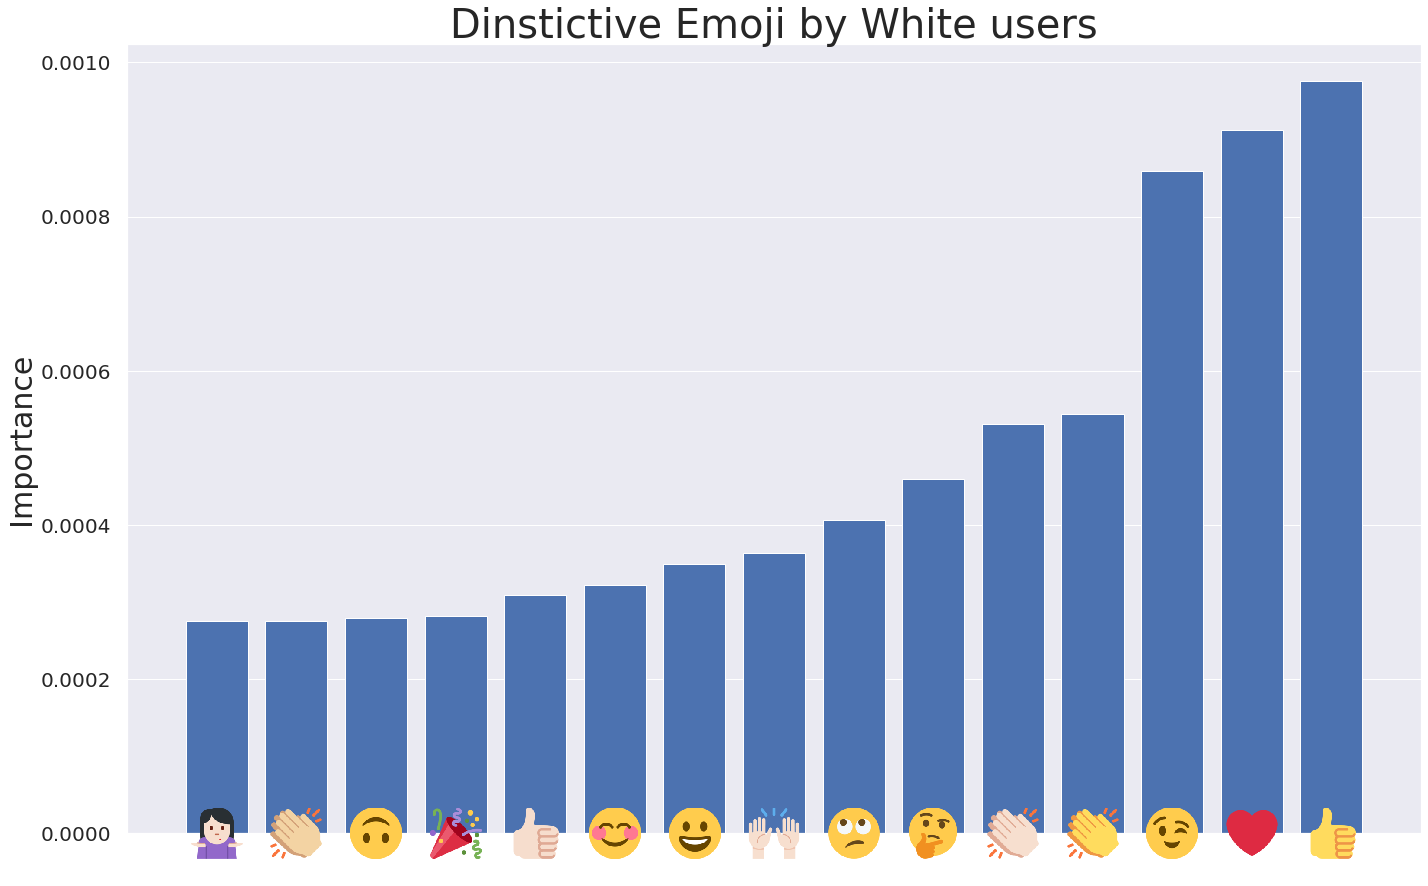

In [24]:
# Top 15 Values
x_g = tree_model_importance_white_pd['Emoji'].tail(15).values
y_g = tree_model_importance_white_pd["Importance"].tail(15).values

# Set linespacing
x_linespace = linspace(0, 4*pi, num=15)

# Plot Bar Chart
sns.set(color_codes=True) # Seaborn 
fig, ax = plt.subplots(figsize=(20,12))
#ax.yaxis.set_major_formatter(formatter_percentage)
ax.tick_params(axis='both', which='major', pad=10)
# ax.set_facecolor('#{}'.format(gender_graph_colours[ind]))
plt.grid(linestyle='-', linewidth=1,axis='y')
plt.bar(x_linespace, y_g, width=0.7, bottom=None, align='center')#,color =colors_indianred_fade)
ax.get_xaxis().set_visible(False)
#plt.xticks(x, fontproperties=emojis_font)  Old method
plt.yticks(fontsize =20)
plt.ylabel('Importance', fontsize =30)
plt.title('Dinstictive Emoji by White users', fontsize =40)
plt.tight_layout()

# Plot emojis on x-axis
bar_chart_plot_emojis(ax,fig,x_g)

plt.show()

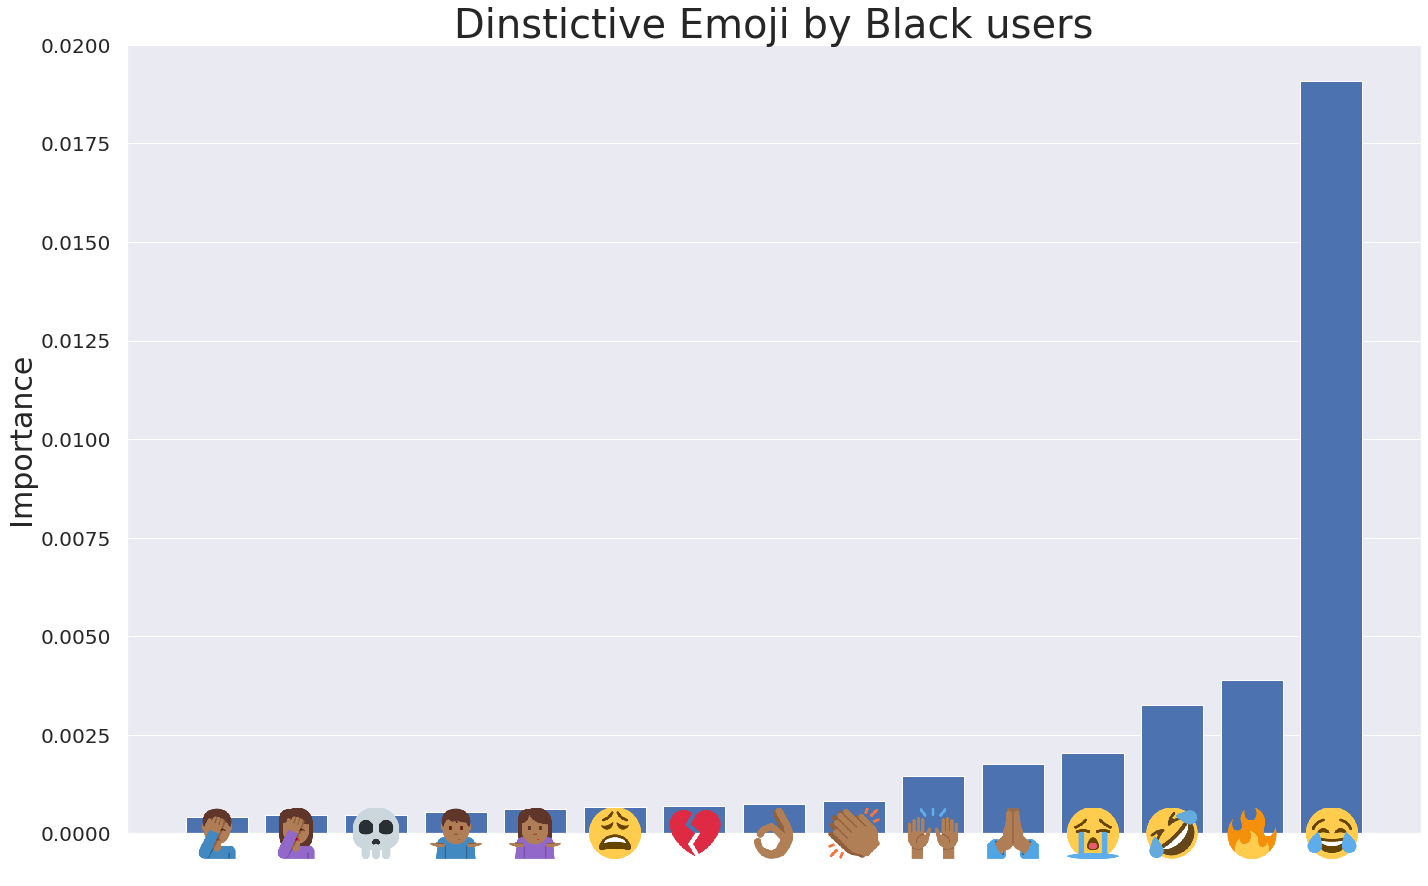

In [25]:
# Top 15 Values
x_g = tree_model_importance_black_pd['Emoji'].tail(15).values
y_g = tree_model_importance_black_pd["Importance"].tail(15).values

# Set linespacing
x_linespace = linspace(0, 4*pi, num=15)

# Plot Bar Chart
sns.set(color_codes=True) # Seaborn 
fig, ax = plt.subplots(figsize=(20,12))
#ax.yaxis.set_major_formatter(formatter_percentage)
ax.tick_params(axis='both', which='major', pad=10)
# ax.set_facecolor('#{}'.format(gender_graph_colours[ind]))
plt.grid(linestyle='-', linewidth=1,axis='y')
plt.bar(x_linespace, y_g, width=0.7, bottom=None, align='center')#,color =colors_indianred_fade)
ax.get_xaxis().set_visible(False)
#plt.xticks(x, fontproperties=emojis_font)  Old method
plt.yticks(fontsize =20)
plt.ylabel('Importance', fontsize =30)
plt.title('Dinstictive Emoji by Black users', fontsize =40)
plt.tight_layout()

# Plot emojis on x-axis
bar_chart_plot_emojis(ax,fig,x_g)

plt.show()

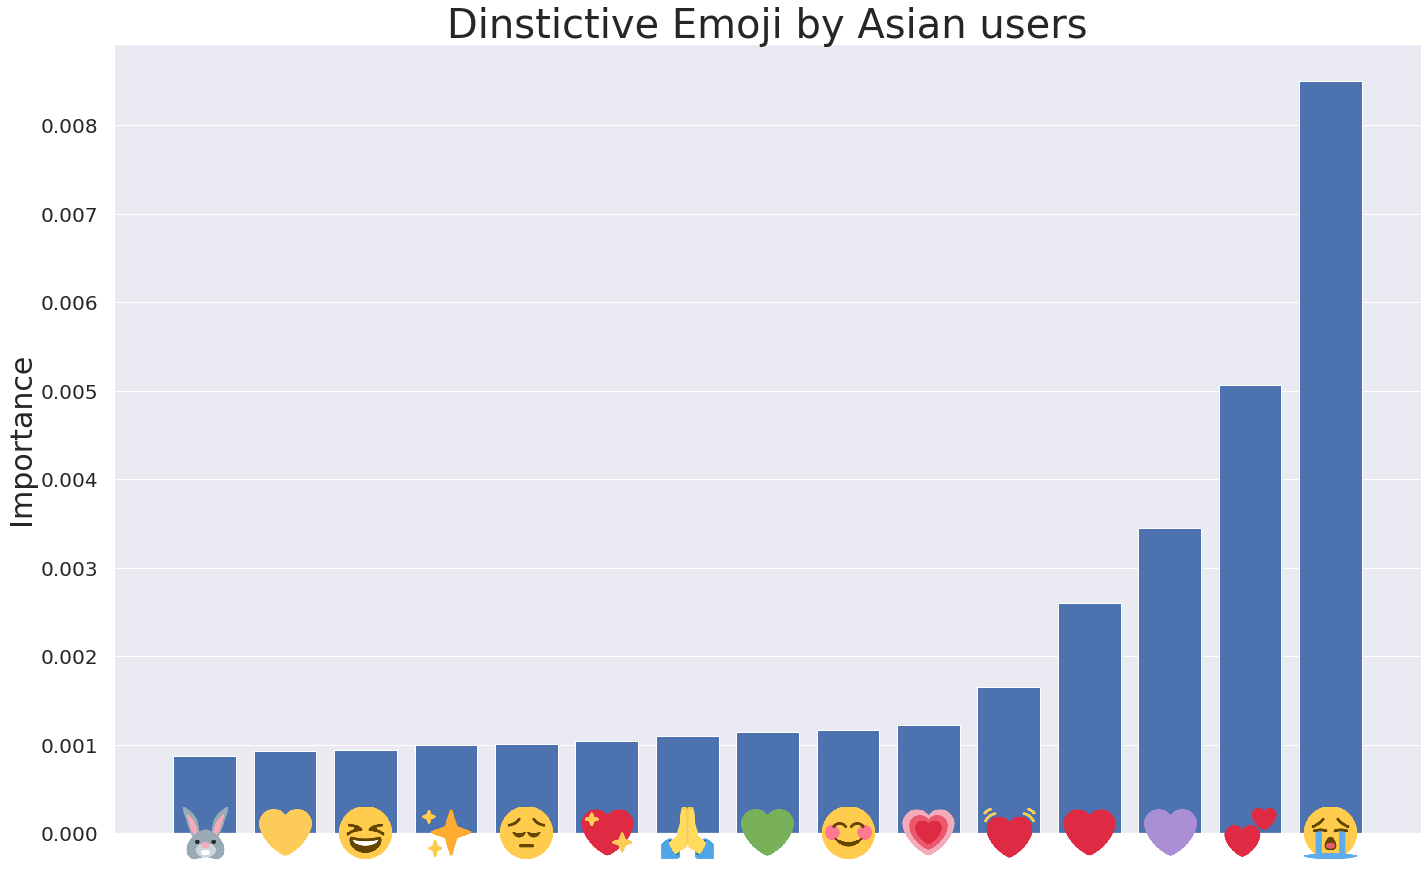

In [26]:
# Top 15 Values
x_g = tree_model_importance_asian_pd['Emoji'].tail(15).values
y_g = tree_model_importance_asian_pd["Importance"].tail(15).values

# Set linespacing
x_linespace = linspace(0, 4*pi, num=15)

# Plot Bar Chart
sns.set(color_codes=True) # Seaborn 
fig, ax = plt.subplots(figsize=(20,12))
#ax.yaxis.set_major_formatter(formatter_percentage)
ax.tick_params(axis='both', which='major', pad=10)
# ax.set_facecolor('#{}'.format(gender_graph_colours[ind]))
plt.grid(linestyle='-', linewidth=1,axis='y')
plt.bar(x_linespace, y_g, width=0.7, bottom=None, align='center')#,color =colors_indianred_fade)
ax.get_xaxis().set_visible(False)
#plt.xticks(x, fontproperties=emojis_font)  Old method
plt.yticks(fontsize =20)
plt.ylabel('Importance', fontsize =30)
plt.title('Dinstictive Emoji by Asian users', fontsize =40)
plt.tight_layout()

# Plot emojis on x-axis
bar_chart_plot_emojis(ax,fig,x_g)

plt.show()

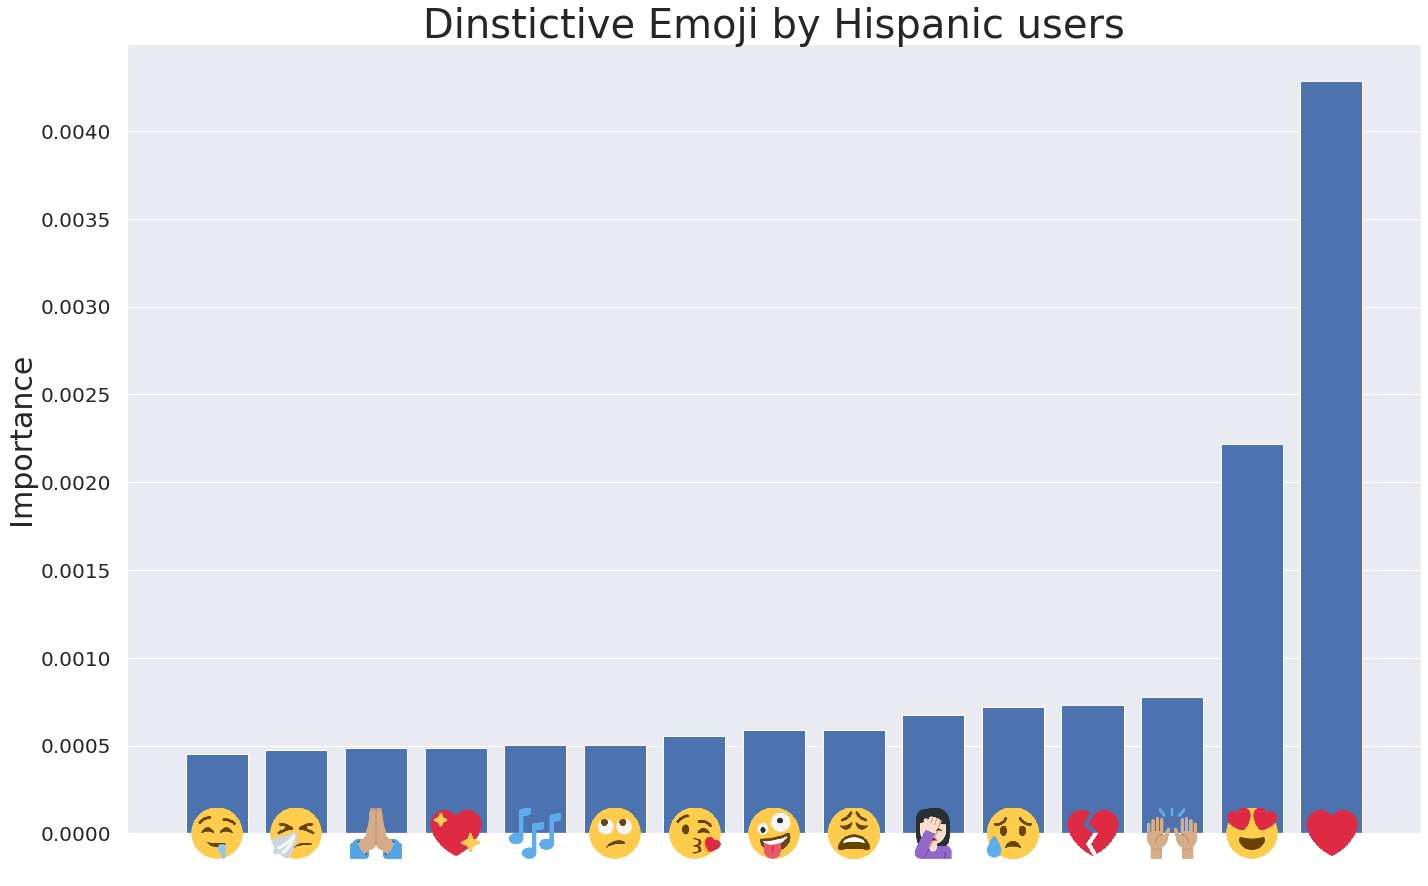

In [27]:
# Top 15 Values
x_g = tree_model_importance_hispanic_pd['Emoji'].tail(15).values
y_g = tree_model_importance_hispanic_pd["Importance"].tail(15).values

# Set linespacing
x_linespace = linspace(0, 4*pi, num=15)

# Plot Bar Chart
sns.set(color_codes=True) # Seaborn 
fig, ax = plt.subplots(figsize=(20,12))
#ax.yaxis.set_major_formatter(formatter_percentage)
ax.tick_params(axis='both', which='major', pad=10)
# ax.set_facecolor('#{}'.format(gender_graph_colours[ind]))
plt.grid(linestyle='-', linewidth=1,axis='y')
plt.bar(x_linespace, y_g, width=0.7, bottom=None, align='center')#,color =colors_indianred_fade)
ax.get_xaxis().set_visible(False)
#plt.xticks(x, fontproperties=emojis_font)  Old method
plt.yticks(fontsize =20)
plt.ylabel('Importance', fontsize =30)
plt.title('Dinstictive Emoji by Hispanic users', fontsize =40)
plt.tight_layout()

# Plot emojis on x-axis
bar_chart_plot_emojis(ax,fig,x_g)

plt.show()